### Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer

from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('../data/EJSCREEN_2021_StatePctile_Tracts.csv')
df.head()

C:\Users\John\AppData\Local\Temp\ipykernel_10628\918942804.py:1: DtypeWarning: Columns (128,129,130,131) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/EJSCREEN_2021_StatePctile_Tracts.csv')


,OBJECTID,ID,STATE_NAME,ST_ABBREV,REGION,ACSTOTPOP,MINORPCT,B_MINORPCT,P_MINORPCT,LOWINCPCT,...,T_PTSDF,T_PTSDF_D2,T_OZONE,T_OZONE_D2,T_PM25,T_PM25_D2,T_UST,T_UST_D2,Shape_Length,Shape_Area
0,1,1001020100,Alabama,AL,4,1993,0.167587,4,30.0,0.274962,...,0.5 facilities/km distance (54%ile),33%ile,37 ppb (24%ile),49%ile,9.15 ug/m3 (75%ile),48%ile,0.41 facilities/sq km area (35%ile),44%ile,19197.315791,1.387495e+07
1,2,1001020200,Alabama,AL,4,1959,0.617152,9,82.0,0.435927,...,0.82 facilities/km distance (65%ile),78%ile,37 ppb (25%ile),73%ile,9.18 ug/m3 (76%ile),73%ile,2.5 facilities/sq km area (77%ile),79%ile,11652.054724,4.694106e+06
2,3,1001020300,Alabama,AL,4,3507,0.348446,7,62.0,0.293128,...,1.3 facilities/km distance (77%ile),31%ile,37.1 ppb (26%ile),56%ile,9.21 ug/m3 (77%ile),55%ile,2 facilities/sq km area (71%ile),33%ile,12474.647834,7.550455e+06
3,4,1001020400,Alabama,AL,4,3878,0.103146,2,15.0,0.216864,...,2.1 facilities/km distance (89%ile),4%ile,37.1 ppb (27%ile),26%ile,9.23 ug/m3 (78%ile),23%ile,3.4 facilities/sq km area (84%ile),2%ile,14839.595823,9.007288e+06
4,5,1001020500,Alabama,AL,4,10596,0.290959,6,54.0,0.203222,...,1.1 facilities/km distance (72%ile),6%ile,37.1 ppb (28%ile),14%ile,9.24 ug/m3 (79%ile),11%ile,2.2 facilities/sq km area (74%ile),2%ile,20306.660651,1.613176e+07


In [3]:
df.shape

(74001, 136)

### Data Cleaning

In [4]:
df.isnull().sum()

OBJECTID           0
ID                 0
STATE_NAME         0
ST_ABBREV          0
REGION             0
                ... 
T_PM25_D2       1718
T_UST              0
T_UST_D2           0
Shape_Length       0
Shape_Area         0
Length: 136, dtype: int64

In [5]:
my_list = [i for i in df.columns if (i.startswith("B_") or i.startswith('P_') or i.startswith("T_") or i.startswith("D_"))]

df.drop(columns = my_list, inplace = True)

In [6]:
df.columns

Index(['OBJECTID', 'ID', 'STATE_NAME', 'ST_ABBREV', 'REGION', 'ACSTOTPOP',
       'MINORPCT', 'LOWINCPCT', 'LESSHSPCT', 'LINGISOPCT', 'UNDER5PCT',
       'OVER64PCT', 'UNEMPPCT', 'VULEOPCT', 'PRE1960PCT', 'DSLPM', 'CANCER',
       'RESP', 'PTRAF', 'PWDIS', 'PNPL', 'PRMP', 'PTSDF', 'OZONE', 'PM25',
       'UST', 'Shape_Length', 'Shape_Area'],
      dtype='object')

In [7]:
df.isnull().sum()

OBJECTID            0
ID                  0
STATE_NAME          0
ST_ABBREV           0
REGION              0
ACSTOTPOP           0
MINORPCT            0
LOWINCPCT           0
LESSHSPCT           0
LINGISOPCT          0
UNDER5PCT           0
OVER64PCT           0
UNEMPPCT            0
VULEOPCT            0
PRE1960PCT          0
DSLPM             581
CANCER            581
RESP              581
PTRAF            2678
PWDIS           19979
PNPL                0
PRMP                0
PTSDF               0
OZONE            1718
PM25             1718
UST                 0
Shape_Length        0
Shape_Area          0
dtype: int64

In [8]:
df.dropna(subset = ['CANCER','OZONE', 'PM25', 'PTRAF'], inplace = True)

In [9]:
df.isnull().sum()

OBJECTID            0
ID                  0
STATE_NAME          0
ST_ABBREV           0
REGION              0
ACSTOTPOP           0
MINORPCT            0
LOWINCPCT           0
LESSHSPCT           0
LINGISOPCT          0
UNDER5PCT           0
OVER64PCT           0
UNEMPPCT            0
VULEOPCT            0
PRE1960PCT          0
DSLPM               0
CANCER              0
RESP                0
PTRAF               0
PWDIS           18447
PNPL                0
PRMP                0
PTSDF               0
OZONE               0
PM25                0
UST                 0
Shape_Length        0
Shape_Area          0
dtype: int64

In [10]:
df.drop([29244], inplace = True)

In [11]:
df.shape
no_pop = df[df['ACSTOTPOP'] == 0]
no_pop.iloc[:,5:]

,ACSTOTPOP,MINORPCT,LOWINCPCT,LESSHSPCT,LINGISOPCT,UNDER5PCT,OVER64PCT,UNEMPPCT,VULEOPCT,PRE1960PCT,...,PTRAF,PWDIS,PNPL,PRMP,PTSDF,OZONE,PM25,UST,Shape_Length,Shape_Area
106,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,273.356438,NaN,0.191795,0.713762,0.266671,40.234862,9.086799,0.000000,41156.771145,9.104656e+07
1063,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,104.972995,3.755846e-04,0.037987,0.158071,0.584650,41.572090,9.719191,0.000000,52092.977874,5.187702e+07
1857,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,402.454515,6.650353e-02,0.239563,3.564415,9.807980,55.347314,8.718053,2.137686,21780.509943,1.959499e+07
3357,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,605.291133,1.419884e-03,0.052764,0.780088,0.187152,41.881613,9.889648,1.692986,15275.826741,7.708539e+06
7058,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,591.649350,NaN,0.095236,3.497021,23.817809,40.848822,12.246520,4.049071,12611.742985,7.728197e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68516,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1585.301891,1.214895e-04,0.109969,1.154310,1.729746,42.125963,8.271328,1.073730,36788.657699,6.019987e+07
69050,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.550050,1.006749e-02,0.086103,1.218309,0.729035,40.657580,7.966296,0.594785,20062.117590,9.852903e+06
69279,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1644.875730,3.028407e-04,0.166771,1.302046,2.478779,39.978442,6.927951,8.504964,7743.617277,3.520204e+06
69280,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,285.992935,NaN,0.184778,0.455815,0.199947,40.333394,6.870835,1.370031,15411.869887,9.527962e+06


In [12]:
no_pop = df[df['ACSTOTPOP'] == 0]
no_pop.iloc[:,5:]

nulls_in_row = no_pop.iloc[:,5:].isnull().sum(axis = 1)
zeros_in_row = (no_pop.iloc[:,5:] == 0).sum(axis = 1)

df.drop(index = (nulls_in_row + zeros_in_row == 34).index, inplace = True)

In [13]:
df.shape

(69875, 28)

### Train/Test Split for Imputers

In [14]:
X = df.drop(columns = ['CANCER', 'STATE_NAME', 'ST_ABBREV', 'ID', 'OBJECTID'])
y = df['CANCER']

X_train, X_val, Y_train, Y_val = train_test_split(X,y, test_size = 0.2, random_state = 13)

In [15]:
it = IterativeImputer(estimator = LinearRegression())
X_train_missing = it.fit_transform(X_train)
X_val_missing = it.transform(X_val)
###it_inc_missing = pd.DataFrame(X_train, columns = ['PWDIS'])
X_train_imputed = pd.DataFrame(X_train_missing, columns = it.get_feature_names_out())
X_val_imputed = pd.DataFrame(X_val_missing, columns = it.get_feature_names_out())

In [16]:
X_train_imputed.isnull().sum()

REGION          0
ACSTOTPOP       0
MINORPCT        0
LOWINCPCT       0
LESSHSPCT       0
LINGISOPCT      0
UNDER5PCT       0
OVER64PCT       0
UNEMPPCT        0
VULEOPCT        0
PRE1960PCT      0
DSLPM           0
RESP            0
PTRAF           0
PWDIS           0
PNPL            0
PRMP            0
PTSDF           0
OZONE           0
PM25            0
UST             0
Shape_Length    0
Shape_Area      0
dtype: int64

In [17]:
X_val_imputed.isnull().sum()

REGION          0
ACSTOTPOP       0
MINORPCT        0
LOWINCPCT       0
LESSHSPCT       0
LINGISOPCT      0
UNDER5PCT       0
OVER64PCT       0
UNEMPPCT        0
VULEOPCT        0
PRE1960PCT      0
DSLPM           0
RESP            0
PTRAF           0
PWDIS           0
PNPL            0
PRMP            0
PTSDF           0
OZONE           0
PM25            0
UST             0
Shape_Length    0
Shape_Area      0
dtype: int64

In [18]:
X_imputed = pd.concat([X_train_imputed, X_val_imputed])

In [19]:
X_train_imputed

,REGION,ACSTOTPOP,MINORPCT,LOWINCPCT,LESSHSPCT,LINGISOPCT,UNDER5PCT,OVER64PCT,UNEMPPCT,VULEOPCT,...,PTRAF,PWDIS,PNPL,PRMP,PTSDF,OZONE,PM25,UST,Shape_Length,Shape_Area
0,5.0,2042.0,0.168462,0.418892,0.102115,0.018980,0.111655,0.128306,0.031915,0.293677,...,40.281304,4.280503e-02,0.756186,0.404997,0.134167,34.312618,5.512758,3.306785,11489.430881,6.054527e+06
1,6.0,4530.0,0.167770,0.409713,0.150657,0.007514,0.058057,0.171523,0.031467,0.288742,...,3.951345,4.466385e-04,0.008048,0.091299,0.089744,41.810646,9.254406,0.018009,156567.392715,9.649394e+08
2,10.0,3154.0,0.198795,0.275129,0.087533,0.039611,0.055168,0.136018,0.039312,0.236962,...,225.311841,1.923777e-04,0.140117,0.362610,1.548818,44.513004,10.894172,0.463434,74644.117267,1.577808e+08
3,6.0,6879.0,0.948684,0.371566,0.174441,0.055975,0.081116,0.100015,0.083145,0.660125,...,192.717892,2.072635e-02,0.080642,0.966930,0.304425,37.862213,10.531636,1.462984,10335.405499,4.681994e+06
4,3.0,4355.0,0.040184,0.253272,0.028219,0.002890,0.062916,0.211940,0.044153,0.146728,...,285.560147,1.129787e-07,1.132111,0.407447,0.446832,41.071608,8.416014,2.357130,11856.010327,6.191793e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55895,7.0,4667.0,0.056139,0.111256,0.048566,0.019681,0.057639,0.191986,0.038052,0.083698,...,808.467794,1.089165e-02,0.063805,0.202013,0.489349,47.709095,8.977369,3.958016,15062.028648,1.088545e+07
55896,7.0,2920.0,0.086644,0.350053,0.046593,0.002611,0.074315,0.210616,0.048946,0.218348,...,0.148371,6.254621e-04,0.039618,0.314671,0.059449,43.038254,8.160397,0.007926,228265.640345,2.545692e+09
55897,3.0,6931.0,0.737844,0.389022,0.134808,0.167559,0.079786,0.133314,0.043912,0.563433,...,582.224986,2.716088e-04,0.031095,0.330699,1.480714,40.603122,8.034703,5.550526,12548.103020,8.305593e+06
55898,5.0,4984.0,0.205257,0.465182,0.116236,0.040827,0.085674,0.120987,0.068293,0.335220,...,1303.818768,3.793895e-04,0.063835,1.090159,1.101311,44.554980,9.803883,15.434336,8107.770609,4.102462e+06


In [20]:
X_val_imputed

,REGION,ACSTOTPOP,MINORPCT,LOWINCPCT,LESSHSPCT,LINGISOPCT,UNDER5PCT,OVER64PCT,UNEMPPCT,VULEOPCT,...,PTRAF,PWDIS,PNPL,PRMP,PTSDF,OZONE,PM25,UST,Shape_Length,Shape_Area
0,1.0,2302.0,0.345352,0.380662,0.107817,0.022406,0.051260,0.154214,0.026050,0.363007,...,234.646103,7.916323e-06,0.052722,0.566740,2.132000,38.255956,5.423400,0.000000,8140.175338,2.838739e+06
1,6.0,5610.0,0.653476,0.572906,0.099902,0.010230,0.075758,0.198396,0.055598,0.613191,...,379.275263,3.355788e-01,0.080719,0.079125,1.475848,58.067659,5.336675,3.938581,7666.174965,2.981901e+06
2,4.0,8599.0,0.313525,0.356158,0.164670,0.034978,0.036051,0.158972,0.067249,0.334841,...,201.735307,1.354354e-05,0.043076,1.103811,0.404569,42.711517,8.421352,3.033331,37877.214733,5.916967e+07
3,2.0,4226.0,0.987222,0.636256,0.392527,0.288677,0.078798,0.164458,0.047319,0.811739,...,1288.273909,1.659845e-07,0.101907,0.438284,11.751988,42.638327,9.106056,17.968944,2551.946543,3.466689e+05
4,3.0,5789.0,0.204353,0.211775,0.135273,0.014599,0.043876,0.181378,0.033616,0.208064,...,2.147930,2.378510e-06,0.035229,0.104389,0.105493,37.570833,6.978218,0.043760,95023.205542,4.218914e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13970,9.0,834.0,0.426859,0.276978,0.000000,0.014205,0.161871,0.026379,0.038388,0.351918,...,32.371611,1.824143e+01,0.014117,0.886564,4.768418,37.893035,8.211098,0.000000,6856.037530,2.116602e+06
13971,9.0,4230.0,0.791726,0.298582,0.255548,0.099398,0.084161,0.052719,0.048113,0.545154,...,3652.688736,2.080551e+01,0.071635,5.070594,23.976294,44.413540,12.076734,10.217390,11818.043488,5.241994e+06
13972,3.0,3968.0,0.024446,0.147681,0.021893,0.000000,0.049899,0.265877,0.051573,0.086064,...,62.000519,5.490802e-03,0.043406,0.189912,0.247819,44.380067,9.587499,0.000000,10608.778435,5.345177e+06
13973,6.0,5028.0,0.450080,0.390195,0.194150,0.000000,0.056086,0.206643,0.056131,0.420137,...,33.157265,1.282486e-02,0.071494,0.071494,0.090297,40.450754,8.584649,0.041531,171964.518885,1.060889e+09


In [21]:
X_imputed

,REGION,ACSTOTPOP,MINORPCT,LOWINCPCT,LESSHSPCT,LINGISOPCT,UNDER5PCT,OVER64PCT,UNEMPPCT,VULEOPCT,...,PTRAF,PWDIS,PNPL,PRMP,PTSDF,OZONE,PM25,UST,Shape_Length,Shape_Area
0,5.0,2042.0,0.168462,0.418892,0.102115,0.018980,0.111655,0.128306,0.031915,0.293677,...,40.281304,4.280503e-02,0.756186,0.404997,0.134167,34.312618,5.512758,3.306785,11489.430881,6.054527e+06
1,6.0,4530.0,0.167770,0.409713,0.150657,0.007514,0.058057,0.171523,0.031467,0.288742,...,3.951345,4.466385e-04,0.008048,0.091299,0.089744,41.810646,9.254406,0.018009,156567.392715,9.649394e+08
2,10.0,3154.0,0.198795,0.275129,0.087533,0.039611,0.055168,0.136018,0.039312,0.236962,...,225.311841,1.923777e-04,0.140117,0.362610,1.548818,44.513004,10.894172,0.463434,74644.117267,1.577808e+08
3,6.0,6879.0,0.948684,0.371566,0.174441,0.055975,0.081116,0.100015,0.083145,0.660125,...,192.717892,2.072635e-02,0.080642,0.966930,0.304425,37.862213,10.531636,1.462984,10335.405499,4.681994e+06
4,3.0,4355.0,0.040184,0.253272,0.028219,0.002890,0.062916,0.211940,0.044153,0.146728,...,285.560147,1.129787e-07,1.132111,0.407447,0.446832,41.071608,8.416014,2.357130,11856.010327,6.191793e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13970,9.0,834.0,0.426859,0.276978,0.000000,0.014205,0.161871,0.026379,0.038388,0.351918,...,32.371611,1.824143e+01,0.014117,0.886564,4.768418,37.893035,8.211098,0.000000,6856.037530,2.116602e+06
13971,9.0,4230.0,0.791726,0.298582,0.255548,0.099398,0.084161,0.052719,0.048113,0.545154,...,3652.688736,2.080551e+01,0.071635,5.070594,23.976294,44.413540,12.076734,10.217390,11818.043488,5.241994e+06
13972,3.0,3968.0,0.024446,0.147681,0.021893,0.000000,0.049899,0.265877,0.051573,0.086064,...,62.000519,5.490802e-03,0.043406,0.189912,0.247819,44.380067,9.587499,0.000000,10608.778435,5.345177e+06
13973,6.0,5028.0,0.450080,0.390195,0.194150,0.000000,0.056086,0.206643,0.056131,0.420137,...,33.157265,1.282486e-02,0.071494,0.071494,0.090297,40.450754,8.584649,0.041531,171964.518885,1.060889e+09


In [22]:
X_imputed['STATE_NAME'] = df['STATE_NAME']
X_imputed['ST_ABBREV'] = df['ST_ABBREV']

In [23]:
X_imputed.isnull().sum()

REGION             0
ACSTOTPOP          0
MINORPCT           0
LOWINCPCT          0
LESSHSPCT          0
LINGISOPCT         0
UNDER5PCT          0
OVER64PCT          0
UNEMPPCT           0
VULEOPCT           0
PRE1960PCT         0
DSLPM              0
RESP               0
PTRAF              0
PWDIS              0
PNPL               0
PRMP               0
PTSDF              0
OZONE              0
PM25               0
UST                0
Shape_Length       0
Shape_Area         0
STATE_NAME      2955
ST_ABBREV       2955
dtype: int64

### Data Visualization

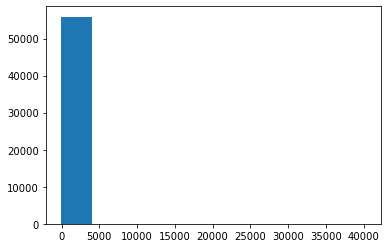

In [24]:
plt.hist(X_train_imputed['PWDIS'], bins = 10);

C:\Users\John\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PWDIS'>

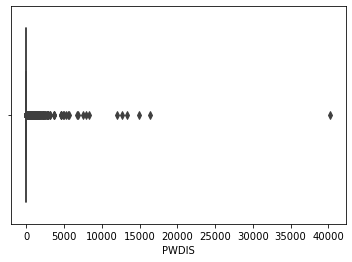

In [25]:
sns.boxplot(X_train_imputed['PWDIS'])

In [26]:
X_imputed

,REGION,ACSTOTPOP,MINORPCT,LOWINCPCT,LESSHSPCT,LINGISOPCT,UNDER5PCT,OVER64PCT,UNEMPPCT,VULEOPCT,...,PNPL,PRMP,PTSDF,OZONE,PM25,UST,Shape_Length,Shape_Area,STATE_NAME,ST_ABBREV
0,5.0,2042.0,0.168462,0.418892,0.102115,0.018980,0.111655,0.128306,0.031915,0.293677,...,0.756186,0.404997,0.134167,34.312618,5.512758,3.306785,11489.430881,6.054527e+06,Alabama,AL
1,6.0,4530.0,0.167770,0.409713,0.150657,0.007514,0.058057,0.171523,0.031467,0.288742,...,0.008048,0.091299,0.089744,41.810646,9.254406,0.018009,156567.392715,9.649394e+08,Alabama,AL
2,10.0,3154.0,0.198795,0.275129,0.087533,0.039611,0.055168,0.136018,0.039312,0.236962,...,0.140117,0.362610,1.548818,44.513004,10.894172,0.463434,74644.117267,1.577808e+08,Alabama,AL
3,6.0,6879.0,0.948684,0.371566,0.174441,0.055975,0.081116,0.100015,0.083145,0.660125,...,0.080642,0.966930,0.304425,37.862213,10.531636,1.462984,10335.405499,4.681994e+06,Alabama,AL
4,3.0,4355.0,0.040184,0.253272,0.028219,0.002890,0.062916,0.211940,0.044153,0.146728,...,1.132111,0.407447,0.446832,41.071608,8.416014,2.357130,11856.010327,6.191793e+06,Alabama,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13970,9.0,834.0,0.426859,0.276978,0.000000,0.014205,0.161871,0.026379,0.038388,0.351918,...,0.014117,0.886564,4.768418,37.893035,8.211098,0.000000,6856.037530,2.116602e+06,District of Columbia,DC
13971,9.0,4230.0,0.791726,0.298582,0.255548,0.099398,0.084161,0.052719,0.048113,0.545154,...,0.071635,5.070594,23.976294,44.413540,12.076734,10.217390,11818.043488,5.241994e+06,District of Columbia,DC
13972,3.0,3968.0,0.024446,0.147681,0.021893,0.000000,0.049899,0.265877,0.051573,0.086064,...,0.043406,0.189912,0.247819,44.380067,9.587499,0.000000,10608.778435,5.345177e+06,District of Columbia,DC
13973,6.0,5028.0,0.450080,0.390195,0.194150,0.000000,0.056086,0.206643,0.056131,0.420137,...,0.071494,0.071494,0.090297,40.450754,8.584649,0.041531,171964.518885,1.060889e+09,District of Columbia,DC


In [27]:
X_imputed[X_imputed['ACSTOTPOP'] <= 50].describe()

,REGION,ACSTOTPOP,MINORPCT,LOWINCPCT,LESSHSPCT,LINGISOPCT,UNDER5PCT,OVER64PCT,UNEMPPCT,VULEOPCT,...,PTRAF,PWDIS,PNPL,PRMP,PTSDF,OZONE,PM25,UST,Shape_Length,Shape_Area
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,...,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,6.600000e+01
mean,4.878788,18.909091,0.474245,0.306091,0.089069,0.043651,0.012554,0.208348,0.070017,0.390168,...,1218.438749,6.074970,0.170378,1.428719,4.969547,42.518400,9.272810,4.794362,28775.254846,1.027337e+08
std,2.581086,12.446473,0.394151,0.416936,0.212327,0.162431,0.048597,0.310816,0.181828,0.325554,...,1568.615802,35.909223,0.230821,2.650723,5.702071,6.255396,1.684550,5.527118,64713.497002,6.211133e+08
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.030704,-26.904960,0.005128,0.040208,0.021035,25.427448,6.111174,0.000000,2139.453306,2.733515e+05
25%,2.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.123825,...,39.237888,0.000011,0.050520,0.231325,0.602380,40.029068,8.347150,0.804787,10257.995105,4.285288e+06
50%,5.000000,16.000000,0.425000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354567,...,487.010282,0.032306,0.093844,0.684473,3.129068,42.567604,8.918366,2.285486,15194.048684,8.865293e+06
75%,6.000000,25.750000,0.821212,0.763980,0.000000,0.000000,0.000000,0.328125,0.000000,0.500000,...,1813.734849,1.678539,0.191128,1.435748,7.249201,45.030780,9.936758,6.623161,25374.541386,1.965392e+07
max,9.000000,49.000000,1.000000,1.000000,1.000000,1.000000,0.250000,1.000000,1.000000,1.000000,...,6319.243082,280.495624,1.165675,17.607654,20.597886,61.689018,13.587899,20.506763,527112.730097,5.043430e+09


In [28]:
X_imputed.describe()

,REGION,ACSTOTPOP,MINORPCT,LOWINCPCT,LESSHSPCT,LINGISOPCT,UNDER5PCT,OVER64PCT,UNEMPPCT,VULEOPCT,...,PTRAF,PWDIS,PNPL,PRMP,PTSDF,OZONE,PM25,UST,Shape_Length,Shape_Area
count,69875.000000,69875.000000,69875.000000,69875.000000,69875.000000,69875.000000,69875.000000,69875.000000,69875.000000,69875.000000,...,69875.000000,69875.000000,69875.000000,69875.000000,69875.000000,69875.000000,69875.000000,69875.000000,6.987500e+04,6.987500e+04
mean,5.214855,4520.872630,0.391131,0.325567,0.126355,0.046539,0.059562,0.162548,0.057923,0.358349,...,740.381931,12.438573,0.139095,0.816860,2.334973,42.678348,8.703846,4.456449,3.642795e+04,1.686342e+08
std,2.453044,2329.267867,0.298907,0.183690,0.104038,0.076541,0.026300,0.080749,0.043512,0.211048,...,1495.425667,338.087751,0.278278,1.118527,3.966688,6.837131,1.746789,7.378310,6.355151e+04,9.708127e+08
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000032,-31.499857,0.001986,0.005603,0.004855,24.566867,3.934336,0.000000,8.815886e+02,4.012731e+04
25%,4.000000,2983.000000,0.133505,0.179080,0.051798,0.000000,0.042431,0.112061,0.029974,0.186570,...,80.969896,0.000131,0.027955,0.154359,0.179340,38.883804,7.650813,0.481289,7.867017e+03,2.881596e+06
50%,5.000000,4182.000000,0.309472,0.298794,0.096893,0.016708,0.057346,0.154806,0.047463,0.301551,...,287.815014,0.007262,0.063680,0.381196,0.859258,42.368099,8.599198,1.968211,1.377576e+04,7.724422e+06
75%,7.000000,5617.000000,0.617470,0.447232,0.170928,0.054722,0.074323,0.198463,0.072892,0.506752,...,764.390553,3.304049,0.136215,1.053034,2.758793,45.005148,9.483625,5.080941,3.651106e+04,4.769909e+07
max,10.000000,72041.000000,1.000000,1.000000,1.000000,1.000000,0.365672,1.000000,1.000000,1.000000,...,42063.593145,56390.566825,8.059139,17.607654,57.751593,74.404086,17.752334,154.788486,1.394917e+06,4.642391e+10


In [29]:
round(X_imputed.mean() - X_imputed[X_imputed['ACSTOTPOP'] <= 50].mean(),4)

C:\Users\John\AppData\Local\Temp\ipykernel_10628\1624839941.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  round(X_imputed.mean() - X_imputed[X_imputed['ACSTOTPOP'] <= 50].mean(),4)


REGION          3.361000e-01
ACSTOTPOP       4.501963e+03
MINORPCT       -8.310000e-02
LOWINCPCT       1.950000e-02
LESSHSPCT       3.730000e-02
LINGISOPCT      2.900000e-03
UNDER5PCT       4.700000e-02
OVER64PCT      -4.580000e-02
UNEMPPCT       -1.210000e-02
VULEOPCT       -3.180000e-02
PRE1960PCT      5.900000e-03
DSLPM          -1.645000e-01
RESP           -3.940000e-02
PTRAF          -4.780568e+02
PWDIS           6.363600e+00
PNPL           -3.130000e-02
PRMP           -6.119000e-01
PTSDF          -2.634600e+00
OZONE           1.599000e-01
PM25           -5.690000e-01
UST            -3.379000e-01
Shape_Length    7.652691e+03
Shape_Area      6.590049e+07
dtype: float64

In [30]:
X_imputed[X_imputed['ACSTOTPOP'] <= 50].shape

(66, 25)

In [31]:
X_imputed[X_imputed['ACSTOTPOP'] <= 100].shape

(89, 25)

In [32]:
X_imputed[X_imputed['ACSTOTPOP'] <= 30].shape

(51, 25)

In [33]:
X_imputed[X_imputed['ACSTOTPOP'] >= 50_000].T.shape

(25, 2)

In [34]:
X_imputed['ACSTOTPOP']

0        2042.0
1        4530.0
2        3154.0
3        6879.0
4        4355.0
          ...  
13970     834.0
13971    4230.0
13972    3968.0
13973    5028.0
13974    5070.0
Name: ACSTOTPOP, Length: 69875, dtype: float64

In [35]:
print((X_imputed['ACSTOTPOP'] < 1200).sum())
print((X_imputed['ACSTOTPOP'] > 8000).sum())
print((X_imputed['ACSTOTPOP'].between(1200,8000)).sum())

1158
4210
64507


In [36]:
X_imputed

,REGION,ACSTOTPOP,MINORPCT,LOWINCPCT,LESSHSPCT,LINGISOPCT,UNDER5PCT,OVER64PCT,UNEMPPCT,VULEOPCT,...,PNPL,PRMP,PTSDF,OZONE,PM25,UST,Shape_Length,Shape_Area,STATE_NAME,ST_ABBREV
0,5.0,2042.0,0.168462,0.418892,0.102115,0.018980,0.111655,0.128306,0.031915,0.293677,...,0.756186,0.404997,0.134167,34.312618,5.512758,3.306785,11489.430881,6.054527e+06,Alabama,AL
1,6.0,4530.0,0.167770,0.409713,0.150657,0.007514,0.058057,0.171523,0.031467,0.288742,...,0.008048,0.091299,0.089744,41.810646,9.254406,0.018009,156567.392715,9.649394e+08,Alabama,AL
2,10.0,3154.0,0.198795,0.275129,0.087533,0.039611,0.055168,0.136018,0.039312,0.236962,...,0.140117,0.362610,1.548818,44.513004,10.894172,0.463434,74644.117267,1.577808e+08,Alabama,AL
3,6.0,6879.0,0.948684,0.371566,0.174441,0.055975,0.081116,0.100015,0.083145,0.660125,...,0.080642,0.966930,0.304425,37.862213,10.531636,1.462984,10335.405499,4.681994e+06,Alabama,AL
4,3.0,4355.0,0.040184,0.253272,0.028219,0.002890,0.062916,0.211940,0.044153,0.146728,...,1.132111,0.407447,0.446832,41.071608,8.416014,2.357130,11856.010327,6.191793e+06,Alabama,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13970,9.0,834.0,0.426859,0.276978,0.000000,0.014205,0.161871,0.026379,0.038388,0.351918,...,0.014117,0.886564,4.768418,37.893035,8.211098,0.000000,6856.037530,2.116602e+06,District of Columbia,DC
13971,9.0,4230.0,0.791726,0.298582,0.255548,0.099398,0.084161,0.052719,0.048113,0.545154,...,0.071635,5.070594,23.976294,44.413540,12.076734,10.217390,11818.043488,5.241994e+06,District of Columbia,DC
13972,3.0,3968.0,0.024446,0.147681,0.021893,0.000000,0.049899,0.265877,0.051573,0.086064,...,0.043406,0.189912,0.247819,44.380067,9.587499,0.000000,10608.778435,5.345177e+06,District of Columbia,DC
13973,6.0,5028.0,0.450080,0.390195,0.194150,0.000000,0.056086,0.206643,0.056131,0.420137,...,0.071494,0.071494,0.090297,40.450754,8.584649,0.041531,171964.518885,1.060889e+09,District of Columbia,DC


In [37]:
X_imputed.isnull().sum()

REGION             0
ACSTOTPOP          0
MINORPCT           0
LOWINCPCT          0
LESSHSPCT          0
LINGISOPCT         0
UNDER5PCT          0
OVER64PCT          0
UNEMPPCT           0
VULEOPCT           0
PRE1960PCT         0
DSLPM              0
RESP               0
PTRAF              0
PWDIS              0
PNPL               0
PRMP               0
PTSDF              0
OZONE              0
PM25               0
UST                0
Shape_Length       0
Shape_Area         0
STATE_NAME      2955
ST_ABBREV       2955
dtype: int64